## Lab 1

Names: Cameron Frary, Carson Moellering

Today we will be learning more skills in Python and investigating the 'Faint Young Sun' problem. To do this, we will need to create plots of data.

You will be working in pairs/trios for this lab. Only one person from your group needs to turn in this lab; everyone should write their names up above. 

#### Coding warm-up

Generate a list (`even_num`) that contains the **even** numbers from 0 to 1000.

In Python, the `%` operator will return the remainder dividing two numbers.

In [1]:
print(6%3)
print(10%3)
print(50%3)

0
1
2


In [2]:
# code to get you started

even_num = []

# Choose 1001 as the parameter for range() so we iterate through 1000
for i in range(1001):
    if i%2 == 0:
        even_num.append(i)

print(even_num)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420,

#### Plotting in Python

There are many ways to create plots in Python. We will be using a package called `matplotlib`.

In [3]:
# import our packages

import matplotlib.pyplot as plt # the 'as' is a nickname for our package; now we can just use 'plt'
import numpy as np

**Aesthetic guidelines for plots:**
- Axes must be labelled and include units
- Size of plot must be appropriate
- Color should be used judiciously (5% of people are colorblind). Shape, line type, and size can also be used to communicate information.
- Legends must be used where appropriate
- If we're looking at geological data, often time is on the y-axis (unique to the geosciences). Otherwise, time is on the x-axis
- Plot type (scatter, line, bar, etc.) should be appropriate for the data being displayed.

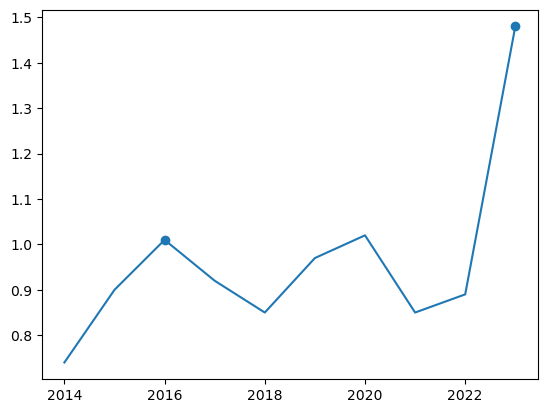

In [4]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
T_anom = [0.74, 0.9, 1.01, 0.92, 0.85, 0.97, 1.02, 0.85, 0.89, 1.48]

enso_T = [1.01, 1.48]
enso_years = [2016, 2023]

plt.plot(years, T_anom) # use the plot function from matplotlib.pyplot
plt.scatter(enso_years, enso_T) # use the scatter function

In [5]:
# From class 1/16...

A = 0.3 # albedo
S = 1370 # energy reaching top of Earth's atmosphere (W/m^2)
sig = 5.67e-8 # Stefan-Boltzmann constant (w/m^2/K^4)
gh_eff = 33 # greenhouse effect in C

T = np.power(((S/4)*(1-A))/sig, (1/4)) # energy balance equation

print(T+gh_eff)


288.00217766738587


#### Functions

Functions are a useful way to help us not have to rewrite big chunks of code.

In [6]:
# Create a function that determines Earth's equilibrium temperature

def calc_T_equil(A, S, sig, gh_eff): # define the function: func_name(input1, input2)
    return np.power(((S/4)*(1-A))/sig, (1/4)) + gh_eff - 273 # 'return' will spit out the equation in C

T_equil = calc_T_equil(A, S, sig, gh_eff)
print(T_equil)

15.002177667385865


#### Practice problem

Stars get brighter (more luminous) as they age (up to a point). Equation 1 from Feulner (2012) describes the evolution in solar luminosity over time:


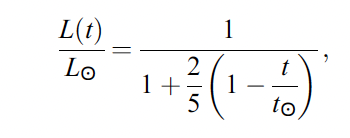

Using Python, use this equation and the equilibrium T equation we developed in class (see above) to plot the equilibrium temperature (in Celsius) of Earth from 4.57 Ga to present. This should be compared with the current temperature of Earth (\~15C) and the temperature at which liquid water would no longer be present on Earth (\~9C). Your plot should be well-labelled and aesthetically pleasing.

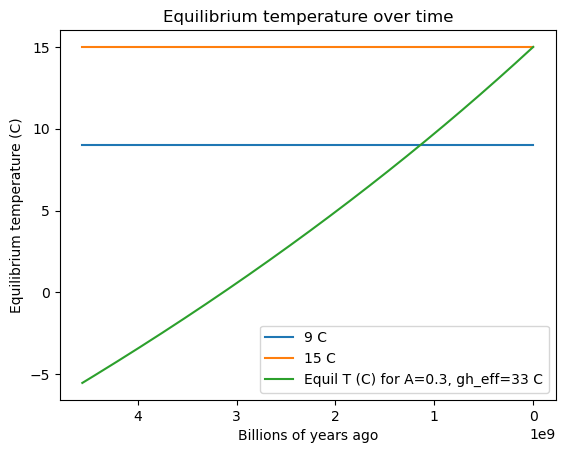

In [13]:
# values to get you started
t0 = 4.57e9 # years
t = list(range(0, 4570000000, 10000000)) # in years ago
S0 = 1370 # present solar luminosity, W/m^2
A = 0.3 # Albedo
sig = 5.67e-8 # W/m^2/K^4 Stefan-Boltzmann constant
gh_eff = 33 # C; present greenhouse effect

def get_luminosity(t): 
    luminosity = S0/(1+0.4*(1-t/t0))  # Calculate luminosity using formula above with L(t) isolated
    return luminosity  # W/m^2

# We plot the freezing line and add it to the legend list right off the bat so that the legend is correct
freezing_line = [9 for i in range(len(t))]  # Create list of the proper length containing only 9 C
plt.plot(t,freezing_line)  # Plot freezing line for reference
present_line = [15 for i in range(len(t))]  # Create list of the proper length containing only 15 C
plt.plot(t,present_line)  # Plot present line for reference
legend_list = ["9 C", "15 C"]  # Add freezing and present lines

def add_equil_line(A, gh_eff):
    
    # initialize empty list of equilibrium temperatures
    equil_temps = []

    # Iterate through years, calculating and adding equilibrium temp
    for years_ago in t:
        lum = get_luminosity(4570000000 - years_ago)  # W/m^2
        equil_temp = calc_T_equil(A, lum, sig, gh_eff)  # C
        equil_temps.append(equil_temp)  # Add equil temps to list

    plt.plot(t, equil_temps)  # Add curve to plot
    legend_list.append(f"Equil T (C) for A={A}, gh_eff={gh_eff} C")  # Add appropriate label to legend list

add_equil_line(A, gh_eff)  # call 

plt.legend(legend_list)
plt.xlabel("Billions of years ago")
plt.gca().invert_xaxis()
plt.ylabel("Equilibrium temperature (C)")
plt.title("Equilibrium temperature over time")
plt.show()


1. Which two variables in the above equation could have been different in the early Earth?
2. Try different values for these two parameters; which combination of parameters leads to an early Earth with liquid water? Keep in mind that a fully ice-covered Earth would have an albedo of 0.8 and that it would be difficult to get albedo below ~0.2.




1. Albedo (A) and present greenhouse effect (gh_eff) could have been different in the early Earth 

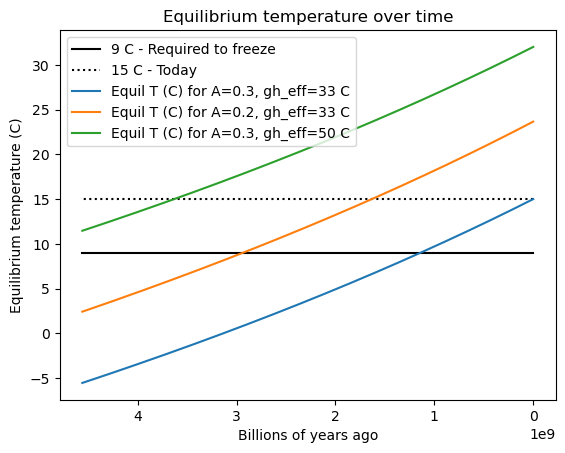

In [14]:
# We plot the freezing line and add it to the legend list right off the bat so that the legend is correct
freezing_line = [9 for i in range(len(t))]  # Create list of the proper length containing only 9 C
plt.plot(t,freezing_line, "k")  # Plot 273 K line for reference
present_line = [15 for i in range(len(t))]  # Create list of the proper length containing only 9 C
plt.plot(t,present_line, "k:")  # Plot 273 K line for reference
legend_list = ["9 C - Required to freeze", "15 C - Today"]  # Add freezing and present lines

# add lines

add_equil_line(A=0.3, gh_eff=33)  # 'Normal' conditions corresponding to today
add_equil_line(A=0.20, gh_eff=33)  # Decreasing albedo to close to lower limit
add_equil_line(A=0.3, gh_eff=50)  # Increasing gh_eff to find minimum viable gh_eff

plt.legend(legend_list)  # Add legend to plot (with list changed by calls to add_equil_line)
plt.xlabel("Billions of years ago")
plt.gca().invert_xaxis()
plt.ylabel("Equilibrium temperature (C)")
plt.title("Equilibrium temperature over time")
plt.show()

2. The blue line uses the initial values we had above. The orange line shows us that no matter how low we put the albedo, within acceptable values it alone cannot account for liquid water in early Earth. We adjusted and changed the greenhouse effect, and found that if we increase this to 50 C early Earth will have liquid water shown with the green line. Note that while these parameter values account for liquid water on early Earth, they do not accurately model the current temperature of Earth. This suggests a need for more complex modelling.